# Lesson 2: cosine similarity and document comparison

Goal is to understand cosine similarity, first geometrically in 2D, then applied to text.  
We'll represent documents as vectors, compute their similarity, and build a small "search function".


## 1) Cosine Similarity in 2D

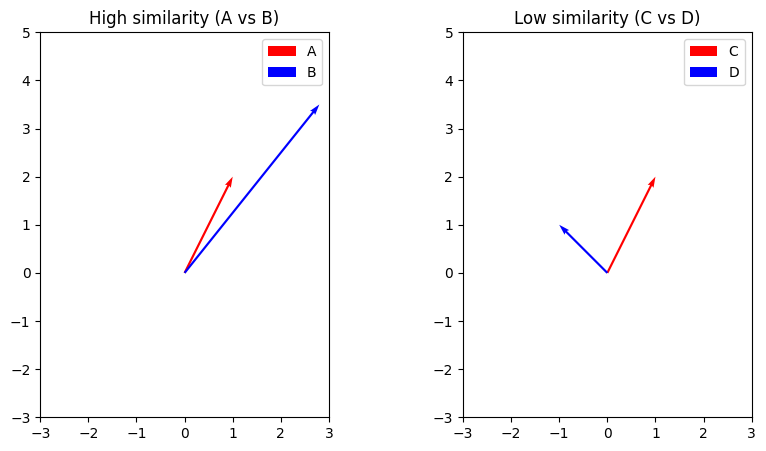

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example 1: High similarity
A = np.array([1, 2])
B = np.array([2.8, 3.5])

# Example 2: Low similarity
C = np.array([1, 2])
D = np.array([-1, 1])

fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Left: high similarity
axes[0].quiver(0,0,A[0],A[1],angles='xy',scale_units='xy',scale=1,color='r',label="A")
axes[0].quiver(0,0,B[0],B[1],angles='xy',scale_units='xy',scale=1,color='b',label="B")
axes[0].set_xlim(-3,3); axes[0].set_ylim(-3,5)
axes[0].set_aspect('equal'); axes[0].legend()
axes[0].set_title("High similarity (A vs B)")

# Right: low similarity
axes[1].quiver(0,0,C[0],C[1],angles='xy',scale_units='xy',scale=1,color='r',label="C")
axes[1].quiver(0,0,D[0],D[1],angles='xy',scale_units='xy',scale=1,color='b',label="D")
axes[1].set_xlim(-3,3); axes[1].set_ylim(-3,5)
axes[1].set_aspect('equal'); axes[1].legend()
axes[1].set_title("Low similarity (C vs D)")

plt.show()

In [2]:
!python -m pip install scikit-learn

In [3]:
# TODO: compute dot product, norms, and cosine similarity manually for the graph on the left
dot = np.dot(A,B)  # np.dot(A,B)
norms = np.linalg.norm(A) * np.linalg.norm(B)  # np.linalg.norm(A) * np.linalg.norm(B)
cos_sim = dot / norms  # dot / norms
cos_sim
print(cos_sim)


0.9778024140774094


In [4]:
# TODO: compute dot product, norms, and cosine similarity manually for the graph on the right
dot = np.dot(C,D)
norms = np.linalg.norm(C) * np.linalg.norm(D)
cos_sim = dot / norms
cos_sim

np.float64(0.31622776601683794)

## 2) Represent Documents as Vectors

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
texts = [
    "The new ERP rollout improved our monthly reporting speed by 40 percent.",
    "Customer support response time is slow but the knowledge base is helpful.",
    "Weekly sales increased after the email campaign and discount codes.",
    "Finance wants to compare actuals vs budget by region on one page.",
    "Legal needs a quick search for similar contract clauses.",
    "Warehouse picking errors dropped once barcodes were introduced.",
    "Cash flow forecasting is better, although the model drifts each quarter.",
    "Late supplier deliveries cause stockouts and unhappy customers.",
    "The Slack bot that summarizes meetings saves everyone time.",
    "The SEO team wants to compare rankings by region and device.",
    "Quarterly reports take too long to prepare without automation tools.",
    "Marketing wants dashboards that track campaign performance in real time.",
    "Inventory management suffers when suppliers don’t update delivery times.",
    "The finance team struggles with consolidating data across regions.",
    "Customer surveys highlight slow response as a recurring complaint.",
    "Warehouse staff prefer barcode scanning to manual entry for accuracy.",
    "Legal reviews contracts manually, making approval cycles very slow.",
    "IT needs better monitoring to catch server outages before users notice.",
    "The analytics team wants to combine web traffic with sales data.",
    "Operations managers request weekly summaries of shipment delays."
]


In [6]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
X.toarray() # TO DO: explain what this is


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(20, 124))

In [7]:
feature_names = vectorizer.get_feature_names_out()   # column order
len(feature_names),
print(feature_names)
feature_names[123]
# TO DO: get the last feature name


['40' 'accuracy' 'actuals' 'analytics' 'approval' 'automation' 'barcode'
 'barcodes' 'base' 'better' 'bot' 'budget' 'campaign' 'cash' 'catch'
 'cause' 'clauses' 'codes' 'combine' 'compare' 'complaint' 'consolidating'
 'contract' 'contracts' 'customer' 'customers' 'cycles' 'dashboards'
 'data' 'delays' 'deliveries' 'delivery' 'device' 'discount' 'don'
 'drifts' 'dropped' 'email' 'entry' 'erp' 'errors' 'finance' 'flow'
 'forecasting' 'helpful' 'highlight' 'improved' 'increased' 'introduced'
 'inventory' 'knowledge' 'late' 'legal' 'long' 'making' 'management'
 'managers' 'manual' 'manually' 'marketing' 'meetings' 'model'
 'monitoring' 'monthly' 'needs' 'new' 'notice' 'operations' 'outages'
 'page' 'percent' 'performance' 'picking' 'prefer' 'prepare' 'quarter'
 'quarterly' 'quick' 'rankings' 'real' 'recurring' 'region' 'regions'
 'reporting' 'reports' 'request' 'response' 'reviews' 'rollout' 'sales'
 'saves' 'scanning' 'search' 'seo' 'server' 'shipment' 'similar' 'slack'
 'slow' 'speed' 's

'weekly'

In [8]:
import pandas as pd
X_df = pd.DataFrame(X.toarray(), columns=feature_names) # TO DO: make this into a pandas dataframe, where columns are the feature names
X_df.head(3)


,40,accuracy,actuals,analytics,approval,automation,barcode,barcodes,base,better,...,track,traffic,unhappy,update,users,vs,wants,warehouse,web,weekly
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 3) Cosine Similarity Between Documents

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(X)
sim_matrix.round(2)




array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.  ,
        0.12, 0.  , 0.  , 0.4 , 0.  , 0.12, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.13, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.14],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.  ,
        0.12, 0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.12, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.13, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0. 

In [10]:
def most_similar(doc_id, X, labels, top_n=3):
    sims = cosine_similarity(X[doc_id], X).flatten() #cosine similarity between the document and the whole matrix.
    ranked = sims.argsort()[::-1][1:top_n+1]
    return [(labels[i], sims[i]) for i in ranked]

# TODO: try this function with the second sentence

print(most_similar(1, X, texts))
print(texts[1])



[('Customer surveys highlight slow response as a recurring complaint.', np.float64(0.4008918628686365)), ('The Slack bot that summarizes meetings saves everyone time.', np.float64(0.14433756729740646)), ('Legal reviews contracts manually, making approval cycles very slow.', np.float64(0.12499999999999997))]
Customer support response time is slow but the knowledge base is helpful.


In [11]:
X.toarray()[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 4) Search with a Query

In [12]:
# TO DO: write a query (i.e. a sentence) that includes words like "Finance", "budget", "report"
query = ["It is end of month for finance and we are over budget please include why in the report."]

q_vec = vectorizer.transform(query)

sims = cosine_similarity(q_vec, X).flatten()
ranked = sims.argsort()[::-1][:3]
[(texts[i], sims[i]) for i in ranked]


[('Finance wants to compare actuals vs budget by region on one page.',
  np.float64(0.4999999999999999)),
 ('The finance team struggles with consolidating data across regions.',
  np.float64(0.2886751345948129)),
 ('Operations managers request weekly summaries of shipment delays.',
  np.float64(0.0))]

Later we'll see advanced methods where words are projected into continuous vector spaces.  
This allows operations like:  

vector("king") - vector("man") + vector("woman") ≈ vector("queen")  
aunt + male ≈ uncle  

Cosine similarity is again the metric that measures closeness in that space.
